In [33]:
# -*- coding: utf-8 -*-
"""
Created on Mon Feb  8 21:43:54 2021

@author: fairu
"""

#Importing all the required libraries
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import learning_curve
from sklearn.metrics import accuracy_score

np.random.seed(0)

#Downloading the dataset, creating dataframe
df = pd.read_csv (r'C:\Users\fairu\Desktop\dataset\final sets\final_dataset_all_SVM.csv')

#Separating data & target information
y= df.iloc [:,16]
X = df.iloc[:,0:16]

# Split samples for training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y) # training split = 70%, test split = 30%

#Split train set with train and validation (val size is 10% samples from training samples)

X_train_only, X_val, y_train_only, y_val = train_test_split(X_train, y_train, test_size = 0.1, random_state=0, stratify=y_train)

# standardization
sc = StandardScaler()

# Scale training data
sc.fit(X_train_only)
X_train_only_std = sc.transform(X_train_only)

sc.fit(X_val)
X_val_std = sc.transform(X_val)

sc.fit(X_test)
X_test_std = sc.transform(X_test)

# training the model
svm = SVC(kernel='linear', C=0.1, max_iter = 300, random_state=0)  #kernel='rbf', C=1, gamma=0.1

# This is training the model
svm.fit(X_train_only_std, y_train_only)

#prediction on validation set
y_pred_val = svm.predict(X_val_std)

print('Training Accuracy: %.2f' % svm.score(X_train_only_std, y_train_only))
print('Validation Accuracy: %.2f' % svm.score(X_val_std, y_val))
print('Misclassified validation samples: %d' % (y_val != y_pred_val).sum())

#Testing with the test data
y_pred_test = svm.predict(X_test_std)
print('Misclassified test samples: %d' % (y_test != y_pred_test).sum())
print('Test Accuracy: %.2f' % accuracy_score(y_test, y_pred_test))


C:\Users\fairu\anaconda3\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


Training Accuracy: 0.83
Validation Accuracy: 0.82
Misclassified validation samples: 191
Misclassified test samples: 809
Test Accuracy: 0.82


In [34]:
from sklearn.metrics import classification_report
target_names = ['scream', 'glass breaking', 'background', 'alarms', 'conversation']
print(classification_report(y_test, y_pred_test, target_names=target_names))

                precision    recall  f1-score   support

        scream       0.91      0.76      0.83       924
glass breaking       0.79      0.95      0.86       915
    background       0.91      0.90      0.90       918
        alarms       0.82      0.61      0.70       918
  conversation       0.72      0.89      0.80       870

      accuracy                           0.82      4545
     macro avg       0.83      0.82      0.82      4545
  weighted avg       0.83      0.82      0.82      4545



In [30]:
occurrences = np.count_nonzero(y_train_only == 3)   #finding the data split
occurrences

1928

In [25]:
occurrences = np.count_nonzero(y_val == 4)   #finding the data split
occurrences

203

In [26]:
occurrences = np.count_nonzero(y_test == 4)   #finding the data split
occurrences

870

In [31]:
#Cross validation score for 10 folds for verification

X_train_std = np.concatenate((X_train_only_std, X_val_std), axis=0)
y_train = np.concatenate((y_train_only, y_val), axis=0)
scores_val = cross_val_score(svm, X_train_std, y_train, cv=10) 



C:\Users\fairu\anaconda3\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\fairu\anaconda3\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\fairu\anaconda3\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\fairu\anaconda3\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver t

In [32]:
scores_val

array([0.9726673 , 0.97832234, 0.96415094, 0.96981132, 0.97735849,
       0.97735849, 0.96698113, 0.97358491, 0.97924528, 0.96886792])

In [33]:
np.mean(scores_val)

0.9728348122988282

In [34]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score

svm.fit(X_train_only_std, y_train_only)
y_pred = svm.predict(X_test_std)
class_names = np.unique(y_test)
target_names = ['scream', 'glass breaking', 'background', 'alarms', 'conversation']
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred, labels=class_names)
print(confmat)


C:\Users\fairu\anaconda3\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


[[903  20   0   1   0]
 [ 31 883   1   0   0]
 [  2   0 904  10   2]
 [  4   1  12 882  19]
 [  1   0   9  21 839]]


<AxesSubplot:>

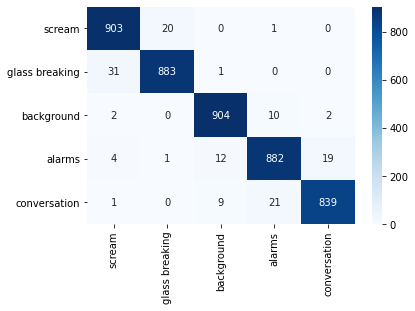

In [35]:
import seaborn as sns
categories = ['scream', 'glass breaking', 'background', 'alarms', 'conversation']
sns.heatmap(confmat, annot=True, fmt="d",cmap='Blues', xticklabels= categories, yticklabels=categories)


In [36]:
#ROC Curve

print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score


Created on Mon Feb  8 21:43:54 2021

@author: fairu



In [37]:
#Downloading the dataset, creating dataframe

df = pd.read_csv (r'C:\Users\fairu\Desktop\dataset\final sets\final_dataset_all_SVM.csv')

#Separating data & target information
y= df.iloc [:,16]
X = df.iloc[:,0:16]

# Binarize the output
y = label_binarize(y, classes=[0, 1, 2, 3, 4])
n_classes = y.shape[1]

In [38]:
random_state = np.random.RandomState(0)
# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3,
                                                    random_state=0)

In [39]:
# Learn to predict each class against the other
classifier = OneVsRestClassifier(svm.SVC(kernel='rbf', C=1, gamma=0.1, max_iter = 500, probability=True,
                                 random_state=random_state))

In [40]:
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

C:\Users\fairu\anaconda3\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\fairu\anaconda3\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\fairu\anaconda3\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\fairu\anaconda3\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver t

In [41]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

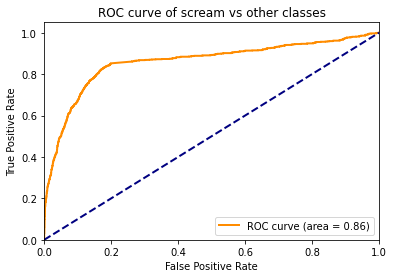

In [42]:
plt.figure()
lw = 2
plt.plot(fpr[0], tpr[0], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[0])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve of scream vs other classes')
plt.legend(loc="lower right")
plt.show()

In [44]:
#Importing all the required libraries
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import learning_curve
from sklearn.metrics import accuracy_score

np.random.seed(0)

#Downloading the dataset, creating dataframe
df = pd.read_csv (r'C:\Users\fairu\Desktop\dataset\final sets\final_dataset_all_SVM.csv')

#Separating data & target information
y= df.iloc [:,16]
X = df.iloc[:,0:16]

# Split samples for training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y) # training split = 70%, test split = 30%

#Split train set with train and validation (val size is 145 samples from 845 training samples)

X_train_only, X_val, y_train_only, y_val = train_test_split(X_train, y_train, test_size = 0.1, random_state=0, stratify=y_train)

# standardization
sc = StandardScaler()

# Scale training data
sc.fit(X_train_only)
X_train_only_std = sc.transform(X_train_only)

sc.fit(X_val)
X_val_std = sc.transform(X_val)

sc.fit(X_test)
X_test_std = sc.transform(X_test)

# training the model
svm = SVC(kernel='rbf', C=1, gamma=0.1, max_iter = 500, random_state=0)


# This is training the model
svm.fit(X_train_only_std, y_train_only)

#prediction on validation set
y_pred_val = svm.predict(X_val_std)

print('Training Accuracy: %.2f' % svm.score(X_train_only_std, y_train_only))
print('Validation Accuracy: %.2f' % svm.score(X_val_std, y_val))
print('Misclassified validation samples: %d' % (y_val != y_pred_val).sum())

#Testing with the test data
y_pred_test = svm.predict(X_test_std)
print('Misclassified test samples: %d' % (y_test != y_pred_test).sum())
print('Test Accuracy: %.2f' % accuracy_score(y_test, y_pred_test))

C:\Users\fairu\anaconda3\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


Training Accuracy: 0.98
Validation Accuracy: 0.97
Misclassified validation samples: 33
Misclassified test samples: 134
Test Accuracy: 0.97


Text(0.5, 0, 'Permutation Importance')

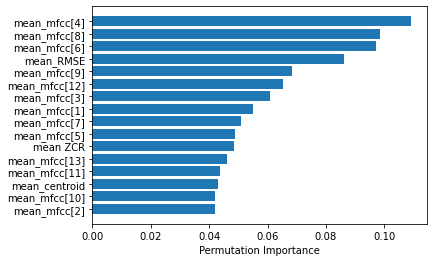

In [45]:
#Permutation importance
from sklearn.inspection import permutation_importance
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


feature_names = ['mean_mfcc[1]', 'mean_mfcc[2]', 'mean_mfcc[3]','mean_mfcc[4]','mean_mfcc[5]','mean_mfcc[6]','mean_mfcc[7]','mean_mfcc[8]','mean_mfcc[9]','mean_mfcc[10]','mean_mfcc[11]','mean_mfcc[12]','mean_mfcc[13]', 'mean ZCR', 'mean_centroid', 'mean_RMSE']
features = np.array(feature_names)

perm_importance = permutation_importance(svm, X_test_std, y_test)

sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(features[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")

In [46]:
#accuracy plot

np.random.seed(0)

#Downloading the dataset, creating dataframe
df = pd.read_csv (r'C:\Users\fairu\Desktop\dataset\final sets\final_dataset_all_SVM.csv')

#Separating data & target information
y= df.iloc [:,16]
X = df.iloc[:,0:16]

# Split samples for training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y) # training split = 70%, test split = 30%

#Split train set with train and validation (val size is 145 samples from 845 training samples)

X_train_only, X_val, y_train_only, y_val = train_test_split(X_train, y_train, test_size = 0.1, random_state=0, stratify=y_train)

# standardization
sc = StandardScaler()

# Scale training data
sc.fit(X_train_only)
X_train_only_std = sc.transform(X_train_only)

sc.fit(X_val)
X_val_std = sc.transform(X_val)

sc.fit(X_test)
X_test_std = sc.transform(X_test)

iter = list(np.arange(0,500,10))

In [47]:
iter = list(np.arange(5,500,25))
acc_score=[]
val_acc=[]
cross_val=[]
g = 0
for g in range(len(iter)):
    svm = SVC(kernel='rbf', C=1, gamma=0.1, max_iter = iter[g], random_state=0)
    # This is training the model
    svm.fit(X_train_only_std, y_train_only)
    acc = svm.score(X_train_only_std, y_train_only)
    y_pred_val = svm.predict(X_val_std)
    val = svm.score(X_val_std, y_val)
    scores = cross_val_score(svm, X_train_only_std, y_train_only, cv=10, scoring='accuracy')
    cross_val.append(scores.mean())
    val_acc.append(val)
    acc_score.append(acc)
    g = g+1
 

C:\Users\fairu\anaconda3\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=5).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\fairu\anaconda3\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=5).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\fairu\anaconda3\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=5).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\fairu\anaconda3\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=5).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminate

C:\Users\fairu\anaconda3\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=80).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\fairu\anaconda3\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=80).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\fairu\anaconda3\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=80).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\fairu\anaconda3\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=80).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver termi

C:\Users\fairu\anaconda3\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=130).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\fairu\anaconda3\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=155).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\fairu\anaconda3\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=155).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\fairu\anaconda3\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=155).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver t

C:\Users\fairu\anaconda3\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=205).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\fairu\anaconda3\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=205).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\fairu\anaconda3\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=230).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\fairu\anaconda3\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=230).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver t

C:\Users\fairu\anaconda3\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=280).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\fairu\anaconda3\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=280).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\fairu\anaconda3\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=280).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\fairu\anaconda3\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=305).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver t

C:\Users\fairu\anaconda3\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=355).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\fairu\anaconda3\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=355).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\fairu\anaconda3\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=355).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\fairu\anaconda3\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=355).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver t

C:\Users\fairu\anaconda3\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=430).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\fairu\anaconda3\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=430).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\fairu\anaconda3\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=430).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\fairu\anaconda3\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=430).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver t

Text(0.5, 1.0, 'Accuracy vs Iteration curve')

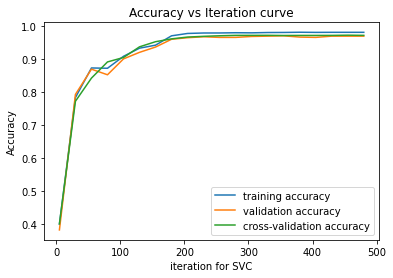

In [48]:
# plot the value of C for SVM (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(iter,acc_score, label='training accuracy')
plt.plot(iter,val_acc, label='validation accuracy')
plt.plot(iter,cross_val, label='cross-validation accuracy')
plt.legend()
# plt.xticks(np.arange(0,27,2))
plt.xlabel('iteration for SVC')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Iteration curve')